In [53]:
import glob
import pandas as pd

In [54]:
#importlib code just for debugging : to allow changes in scripts we are imporing from
#reflect here. It can be removed if you are not making changes to the scripts we are imporing from

import importlib ##can remove
import graphing_config as GC
import or_common as orc
importlib.reload(GC) ##can remove
importlib.reload(orc) ##can remove

<module 'or_common' from '/gpfs/gibbs/pi/reilly/VariantEffects/scripts/noon_scripts/5.graphs/odds_ratio/or_common.py'>

In [55]:
phylop_emvar=pd.read_csv(glob.glob(GC.data_base_path+"phylop_emvar/*.csv")[0])

In [65]:
phylop_emvar["non_emvar"]=~( phylop_emvar["emVar_K562"]) & ~( phylop_emvar["emVar_HepG2"]) & ~( phylop_emvar["emVar_SKNSH"])

In [66]:
phylop_emvar

,phylop_significant,is_in_dELS,is_in_CA,is_in_pELS,is_in_CA-H3K4me3,is_in_CA-CTCF,is_in_PLS,is_in_TF,is_in_CA-TF,emVar_K562,emVar_SKNSH,emVar_HepG2,count,non_emvar
0,True,False,False,True,False,False,False,False,False,True,True,True,14781.0,False
1,True,False,False,False,False,False,False,True,False,True,False,False,262.0,False
2,False,False,False,False,False,False,False,False,True,False,False,True,4986.0,False
3,True,False,False,False,False,False,True,False,False,False,True,True,1660.0,False
4,False,True,False,False,False,False,False,False,False,False,True,False,304957.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,False,False,False,False,False,True,False,False,False,True,False,True,11273.0,False
140,False,False,False,False,False,False,False,False,False,False,False,False,388558564.0,True
141,False,False,False,False,False,False,False,False,False,True,False,True,171201.0,False
142,True,False,False,True,False,False,False,False,False,True,False,True,2688.0,False


In [69]:


final=[]

for region in GC.genome_regions:
    working=phylop_emvar
    if region != "ALL":
        working=phylop_emvar[(phylop_emvar[region]==True)]
    
    
    for b_col in ["emVar_K562","emVar_SKNSH","emVar_HepG2","non_emvar"]:
        ret=orc.compute_OR(df=working,
                   a="phylop_significant",
                   a_val=True,
                   b=b_col,
                   b_val=True)
        ret["emvar_status"]=b_col
        ret["region"]=region
        final.append(ret)
        


df=pd.DataFrame(final)

In [70]:
df

,OR,ci_lower,ci_upper,p,emvar_status,region
0,2.620500,2.587023,2.654411,0.0,emVar_K562,is_in_PLS
1,2.665447,2.628511,2.702901,0.0,emVar_SKNSH,is_in_PLS
2,2.764023,2.719685,2.809085,0.0,emVar_HepG2,is_in_PLS
3,0.401843,0.397187,0.406554,0.0,non_emvar,is_in_PLS
4,1.198898,1.190767,1.207086,0.0,emVar_K562,is_in_dELS
5,1.240089,1.230729,1.249520,0.0,emVar_SKNSH,is_in_dELS
6,1.290412,1.280366,1.300537,0.0,emVar_HepG2,is_in_dELS
7,0.810809,0.806319,0.815324,0.0,non_emvar,is_in_dELS
8,2.222840,2.197326,2.248651,0.0,emVar_K562,is_in_pELS
9,2.303036,2.272993,2.333477,0.0,emVar_SKNSH,is_in_pELS


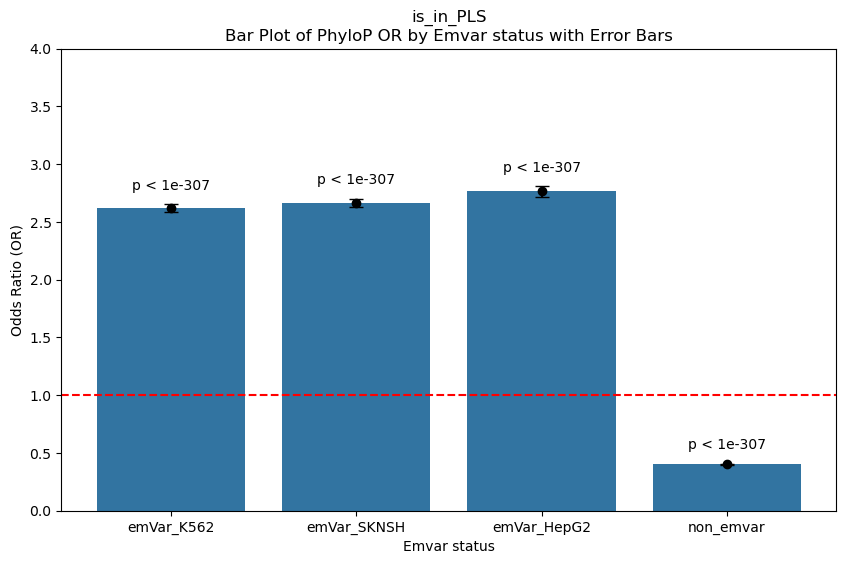

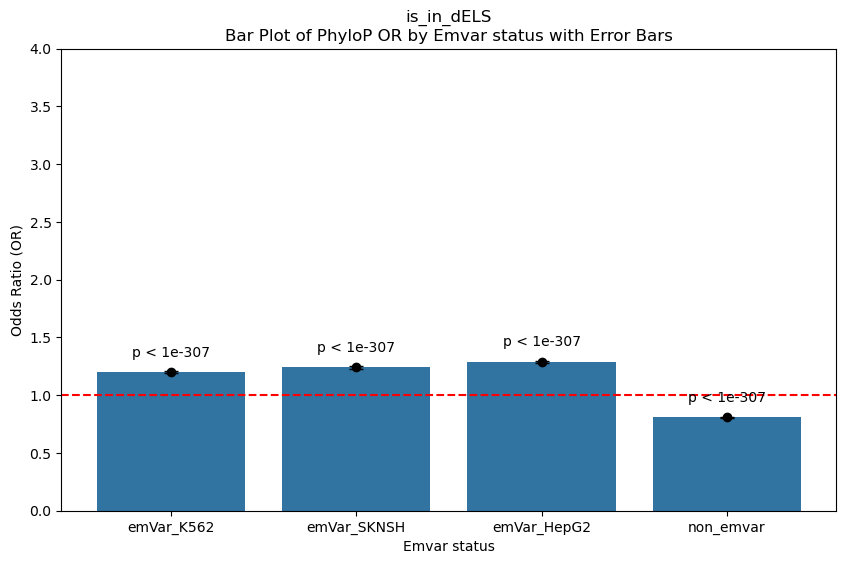

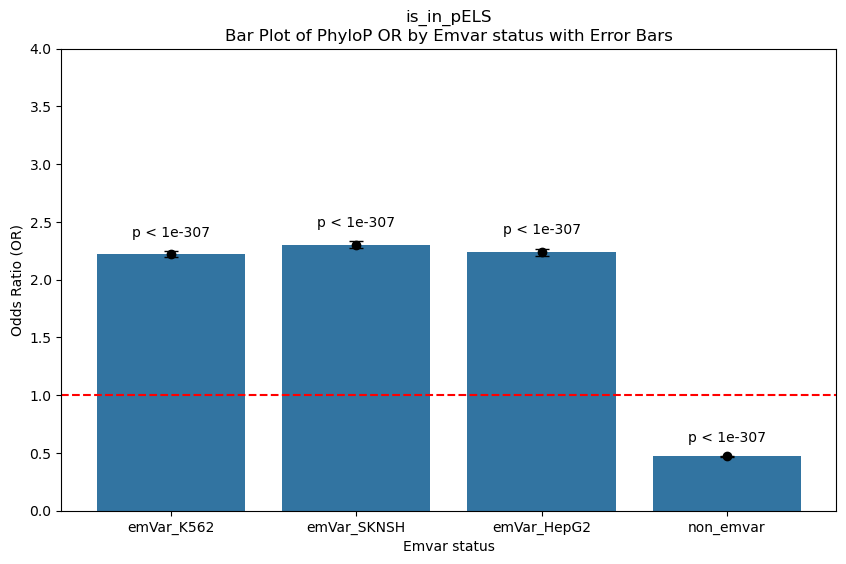

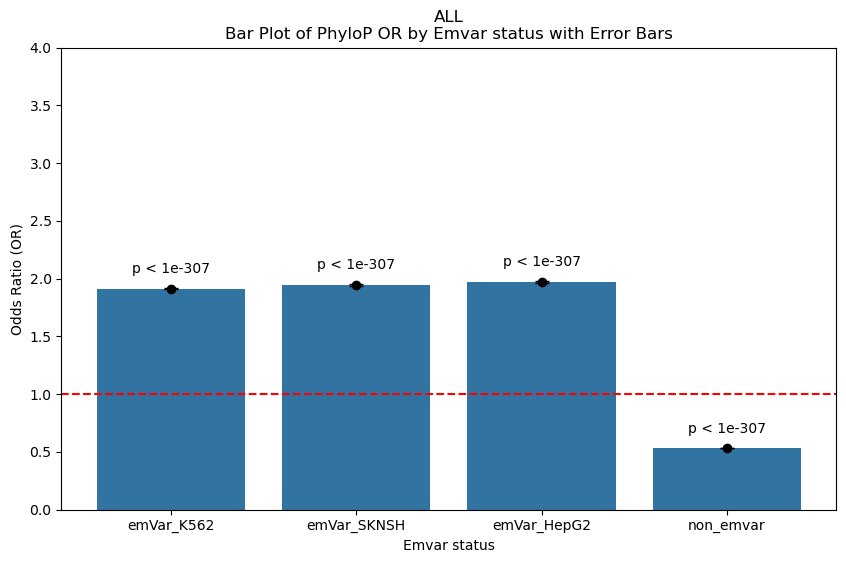

In [71]:
for region in GC.genome_regions:

    temp=df[df["region"]==region]
    
    orc.plot_or(df=temp,
                x='emvar_status',
                y='OR',
                xlabel='Emvar status',
                ylim=4.0,
                title=f'{region}\nBar Plot of PhyloP OR by Emvar status with Error Bars')